# Parametric Tests

#### The Kolmogorov-Smirnov test focuses more on the centrality of the data. Consequently, however, the test has less power if there is a wide variance around the center of the data. Anderson-Darling focuses more on the tails of the data than the center and is more likely to identify non-conformity to normality if data is heavy-tailed with extreme outliers. These two tests perform well on large sample sizes but do not have as much power when sample sizes are lower. The third test we consider, Shapiro-Wilk, is more general than the Kolmogorov-Smirnov and Anderson-Darling tests and therefore more robust to small sample sizes. Based on these traits, it may be more useful to use Shapiro-Wilk tests in an automated pipeline. Alternatively, it may be better to lower the level of confidence for the test being applied.

## Kolmogorov-Smirnov

#### The Kolmogorov-Smirnov test can be used to test the null hypothesis that a given sample distribution is normally distributed. This version of the Kolmogorov-Smirnov test is the one-sample goodness-of-fit test, which performs analysis against a benchmark cumulative density distribution. When running the kstest function in the scipy.stats module, using stats.norm.cdf (scipy’s cumulative density function) performs this one-sample version of the test. The two-sample version tests against a specified distribution to determine whether the two distributions match. In the two-sample case, the distribution to be tested must be provided as a numpy array instead of the stats.norm.cdf function used in the code snippet shown below Figure 4.3. However, this is outside of the scope of testing for normality, so we will not look at this.

#### Kolmogorov-Smirnov measures a calculated test statistic against a table-based critical value (kstest calculates this internally). As with other hypothesis tests, if the test statistic is larger than the critical value, the null hypothesis that the given distribution is normally distributed can be rejected. This can also be assessed if the p-value is low enough to be significant. The test statistic is calculated as the absolute value of the maximum distance between all data points in the given distribution against the cumulative density function.

## KOLMOGOROV-SMIRNOV SPECIAL REQUIREMENT

#### The Kolmogorov-Smirnov test requires data to be centered around zero and scaled to a standard deviation of one. All data must be transformed for the test, but inference can be applied to the pre-transformed distribution; the centered and scaled distribution does not need to be the distribution used in further statistical testing or analysis.

In [2]:
from scipy import stats
import numpy as np
mu, sigma = 0, 1
normally_distributed = np.random.normal(mu, sigma, 1000)

stats.kstest(normally_distributed,
             stats.norm.cdf)

KstestResult(statistic=0.030329008345265418, pvalue=0.31020996163951164, statistic_location=0.4115653723352908, statistic_sign=1)

In [3]:
stats.kstest(np.exp(normally_distributed), stats.norm.cdf)

KstestResult(statistic=0.5310428209444901, pvalue=9.943698899899565e-264, statistic_location=0.10810253397924445, statistic_sign=-1)

In [5]:
mu, sigma = 100, 2
normally_distributed = np.random.normal(mu, sigma, 1000)
normally_distributed_scaled = (
normally_distributed-normally_distributed.mean()) /normally_distributed.std()
stats.kstest(normally_distributed_scaled, stats.norm.cdf)

KstestResult(statistic=0.018687284805557258, pvalue=0.869393452090583, statistic_location=0.6016989191439979, statistic_sign=1)

## Anderson-Darling

#### Similar to the Kolmogorov-Smirnov test, the Anderson-Darling test measures a given distribution against a normally distributed distribution. In scipy’s anderson test, we can test against other distributions, but the default argument specifying a normal distribution, dist="norm", assumes a null hypothesis that the given distribution is statistically the same as a normally distributed distribution. For each distribution tested against, a different set of critical values must be calculated.

#### Note that while both the Anderson-Darling and Kolmogorov-Smirnov tests use the cumulative density frequency distributions to test for normality, the Anderson-Darling test is different from the Kolmogorov-Smirnov test because it weights the variance in the tails of the cumulative density frequency distribution more than the middle. This is because the variance in the tails can be measured in smaller increments than in the middle of the distribution. Consequently, the Anderson-Darling test is more sensitive to tails than the Kolmogorov-Smirnov test. In line with the Kolmogorov-Smirnov test, a test statistic is calculated and measured against a critical value. If the test statistic is larger than the critical value, the null hypothesis that the given distribution is normally distributed can be rejected at the specified level of significance.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
not_normally_distributed = np.exp(normally_distributed)


from scipy import stats
import pandas as pd
import numpy as np
def anderson_test(data):
    data = np.array(data)
    test_statistic, critical_values, significance_levels = stats.anderson(normally_distributed, dist='norm')
    df_anderson = pd.DataFrame({'Test Statistic':np.repeat(test_statistic, len(critical_values)), 'Critical Value':critical_values, 'Significance Level': significance_levels})
    df_anderson.loc[df_anderson['Test Statistic'] >= df_anderson['Critical Value'], 'Normally Distributed'] = 'No'
    df_anderson.loc[df_anderson['Test Statistic'] <df_anderson['Critical Value'], 'Normally Distributed'] = 'Yes'
    return df_anderson;
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
anderson_test(normally_distributed)

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.65964,0.574,15.0,No
1,0.65964,0.653,10.0,No
2,0.65964,0.784,5.0,Yes
3,0.65964,0.914,2.5,Yes
4,0.65964,1.088,1.0,Yes


In [10]:

not_normally_distributed = np.exp(normally_distributed)
anderson_test(not_normally_distributed)

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.65964,0.574,15.0,No
1,0.65964,0.653,10.0,No
2,0.65964,0.784,5.0,Yes
3,0.65964,0.914,2.5,Yes
4,0.65964,1.088,1.0,Yes


## Shapiro-Wilk

#### The Shapiro-Wilk test is a goodness-of-fit test that checks whether a given distribution is normally distributed. The test checks how closely a distribution of observed values centered on 0 and scaled to a unit variance of 1 approximates an observed centered and scaled standard normal distribution. This centering and scaling (called standardizing) are performed within the function in the scipy.stats shapiro module, so input data does not need to be altered prior to testing. The level of significance for this test in scipy is 0.05.

#### Shapiro-Wilk is ideal, compared to Kolmogorov-Smirnov and Anderson-Darling, for testing small sample sizes of roughly less than 50. However, one drawback is that since Shapiro-Wilk uses repeated sampling and testing for the calculated test statistic by applying Monte Carlo simulation, the law of large numbers poses a risk that as the sample size increases, there is an inherent increase in the risk of encountering a type II error (a loss of power) and failing to reject the null hypothesis, where the null hypothesis states the given distribution is normally distributed.

In [12]:
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
stats.shapiro(normally_distributed)

ShapiroResult(statistic=0.9985997923837231, pvalue=0.620909698769699)

In [18]:
not_normally_distributed = np.exp(normally_distributed)
stats.shapiro(not_normally_distributed)

ShapiroResult(statistic=0.1964559639009531, pvalue=5.701007766361151e-54)

## Durbin-Watson

#### One of the most common tests performed to assess a lack of independence in sampling is the first-order (also referred to as lag-one) autoregressive test called the Durbin-Watson test. Autoregressive means previous data points are used to predict the current data point. First-order means the last sampled data point (lag one) is the point most significantly correlated to the most recently sampled data point (lag zero) in a sequence of sampled data. In first-order autocorrelation, the correlation for each data point is strongest with the previous data point. The Durbin-Watson test does not test whether any value is correlated to the value before it, but instead if, overall, there is a strong enough relationship between each value and the value before it to conclude there is significant autocorrelation. In that sense, there is some robustness to non-independent sampling such that an accident or two may not completely invalidate a hypothesis test, but a consistent recurrence of this type of violation will.

#### A Durbin-Watson value of 2 indicates no significant autocorrelation, a value between 0 and 2 represents positive (direct) autocorrelation, and a value between 2 and 4 represents negative (inverse) autocorrelation.

Text(0.5, 1.0, 'Durbin Watson = 1.918928085035694')

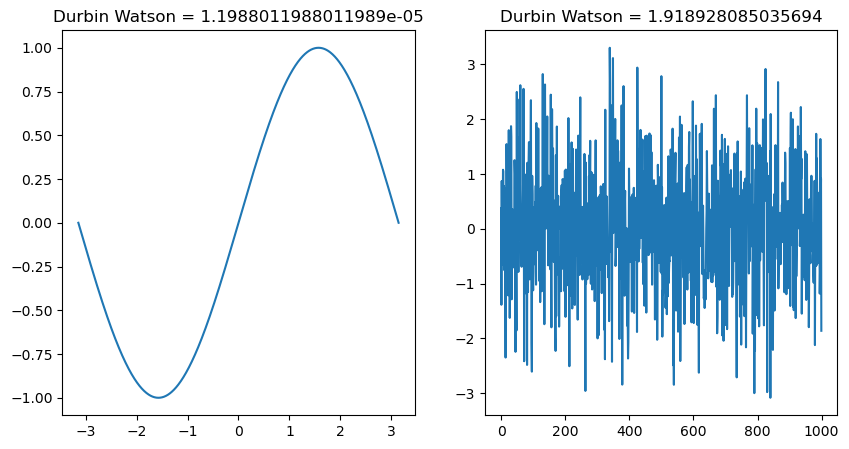

In [19]:
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import numpy as np
mu, sigma = 0, 1.1
independent_samples = np.random.normal(mu, sigma, 1000)
correlated_samples = np.linspace(-np.pi, np.pi, num=1000)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(correlated_samples, np.sin(correlated_samples))
ax[0].set_title('Durbin Watson = {}'.format(durbin_watson(correlated_samples)))
ax[1].plot(independent_samples)
ax[1].set_title('Durbin Watson = {}'.format(durbin_watson(independent_samples)))

## Testing for equal variance
#### When testing for equal variance among distributions, we have two prominent tests: Levene’s test for equality of variances and Fisher’s F-test.

## Levene’s test for equality of variances

#### Levene’s test for equality of variances is useful when testing for homogeneity of variance of two or more groups. In the code snippet shown below Figure 4.8, we test with three distributions, each having a sample size of 100, a mean of 0, and standard deviations of 0.9, 1.1, and 2. Figure 4.8 is a plot of the three distributions generated using the data output from the code above Figure 4.8.

In [22]:
from scipy.stats import levene
np.random.seed(26)
mu1, sigma1, mu2, sigma2, mu3, sigma3 = 0,0.9,0,1.1,0,2
distro1, distro2, distro3 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
distro1['x'] = np.random.normal(mu1, sigma1, 100)
distro2['x'] = np.random.normal(mu2, sigma2, 100)
distro3['x'] = np.random.normal(mu3, sigma3, 100)


In [23]:
f_statistic, p_value = levene(distro1['x'], distro2['x'], distro3['x'])
if p_value <= 0.05:
    print('The distributions do not have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))
else:
    print('The distributions have homogenous variance.P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))

The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 30.3979


## Fisher’s F-test
#### Fisher’s F-test is useful when testing for homogeneity of variance for two groups at a time. This test compares a test statistic to a critical value to determine whether the variances are statistically the same or not. The calculated F-statistic is the variance of group one divided by the variance of group two. Group one is always the group with the larger variance.

In [24]:
from scipy.stats import f
def f_test(inputA, inputB):
    group1 = np.array(inputA)
    group2 = np.array(inputB)
    if np.var(group1) > np.var(group2):
        f_statistic = np.var(group1) / np.var(group2)
        numeratorDegreesOfFreedom = group1.shape[0] - 1
        denominatorDegreesOfFreedom = group2.shape[0] - 1
    else:
        f_statistic = np.var(group2)/np.var(group1)
        numeratorDegreesOfFreedom = group2.shape[0] - 1
        denominatorDegreesOfFreedom = group1.shape[0] - 1
    p_value = 1 - f.cdf(f_statistic,numeratorDegreesOfFreedom, denominatorDegreesOfFreedom)
    if p_value <= 0.05:
        print('The distributions do not have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))
    else:
        print('The distributions have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))
f_test(distro3['x'], distro1['x'])

The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 5.6309


In [25]:
import numpy as np
from scipy.stats import norm

# Known population parameters and sample statistics
population_mean = 70  # population mean (mu)
population_std = 4    # population standard deviation (sigma)
sample_mean = 72      # sample mean
sample_size = 30      # sample size (n)
alpha = 0.05          # significance level for a two-tailed test

# Calculate the Z-test statistic
z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate the critical value for a two-tailed test
critical_value = norm.ppf(1 - alpha/2)

# Compare the z_statistic with the critical value
print(f"Z-statistic: {z_statistic}")
print(f"Critical Value: ±{critical_value}")

# Decision: reject or fail to reject the null hypothesis
if abs(z_statistic) > critical_value:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the sample mean from the population mean.")


Z-statistic: 2.7386127875258306
Critical Value: ±1.959963984540054
Reject the null hypothesis: The sample mean is significantly different from the population mean.


## T-test – a parametric hypothesis test

#### In the last chapter, the z-test for means was applied when population standard deviations were known. However, in the real world, it is not easy (or virtually impossible) to obtain the population standard deviation. In this section, we will discuss another hypothesis test called the t-test, which is used when the population standard deviations are unknown. The mean and the standard deviation of a population are estimated by taking the mean and the standard deviation of sample data representative of this population.

In [26]:
# libraries
import numpy as np
import scipy.stats as stats
# creating normal distribution
x =np.linspace(-5, 5, 1000) #create 1000 point from -5 to 5
y = stats.norm.pdf(x) # create probability density for each point x  - normal distribution
# creating Student t distributions for 2 sample sizes n =3 and n =15
degree_freedom1 = 2
t_dis1 = stats.t.pdf(x, degree_freedom1)
degree_freedom2 = 15
t_dis2 = stats.t.pdf(x, degree_freedom2)

In [28]:
import scipy.stats
round(scipy.stats.t.sf(abs(1.9), df=14),4)

0.0391

In [29]:
import scipy.stats as stats
alpha = 0.05 # level of significance
df= 15 # degree of freedom
#find t critical value for left-tailed test
print(f" The critical value is {stats.t.ppf(q= alpha, df =df)}")
#find t critical value for right-tailed test
print(f" The critical value is {stats.t.ppf(q= 1-alpha, df =df)}")
##find t critical value for two-tailed test
print(f" The critical values are {-stats.t.ppf(q= 1-alpha/2, df =df)} and {stats.t.ppf(q= 1-alpha/2, df =df)}")

 The critical value is -1.7530503556925552
 The critical value is 1.7530503556925547
 The critical values are -2.131449545559323 and 2.131449545559323


In [31]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# Load data
data = load_iris()
X = data.data
y = data.target

# Initialize classifiers
clf1 = LogisticRegression(max_iter=200)
clf2 = SVC(kernel='linear')

# Perform 10-fold cross-validation
scores1 = cross_val_score(clf1, X, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(clf2, X, y, cv=10, scoring='accuracy')

# Print the mean accuracy of each classifier
print(f"Mean accuracy for Logistic Regression: {np.mean(scores1):.3f}")
print(f"Mean accuracy for SVC: {np.mean(scores2):.3f}")

# Conduct a paired t-test
t_stat, p_value = ttest_rel(scores1, scores2)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant difference in performance between the models.")
else:
    print("There is no statistically significant difference in performance between the models.")


Mean accuracy for Logistic Regression: 0.973
Mean accuracy for SVC: 0.973
t-statistic: 0.0, p-value: 1.0
There is no statistically significant difference in performance between the models.


In [33]:
IQscoresA=[113, 107, 106, 115, 103, 103, 107, 102,108, 107,
            104, 104, 99, 102, 102, 105, 109, 97, 109, 103,
            103, 100, 97, 107, 116, 117, 105, 107, 104, 107]
IQscoresB = [102, 108, 110, 101, 98, 98, 97, 102, 102, 103,
             100, 99, 97, 97, 94, 100, 104, 98, 92, 104,
            98, 95, 92, 111, 102, 112, 100, 103, 103, 100]

# F-test
import numpy as np
import scipy.stats as stats
IQscoresA = np.array(IQscoresA)
IQscoresB = np.array(IQscoresB)
f = np.var(IQscoresA, ddof=1)/np.var(IQscoresB, ddof=1) # F statistic
dfA = IQscoresA.size-1 #degrees of freedom A
dfB = IQscoresB.size-1 #degrees of freedom B
p = 1-stats.f.cdf(f, dfA, dfB) #p-value

In [34]:
from statsmodels.stats.weightstats import ttest_ind as ttest
t_statistic, p_value, degree_freedom = ttest(IQscoresA,
    IQscoresB, alternative='two-sided', usevar='pooled')

#### Hypothesis Testing, we defined the expected error rate for a hypothesis test as α. This is the rate at which we expect a single hypothesis test to result in a Type I error. In our example with factory machines, we are making three hypothesis tests, which means we are three times more likely to see a Type I error. While our example specifically considers multiple tests for differences in means, this applies to any type of hypothesis test. In these situations with multiple tests, we will generally define a familywise error rate (FWER) and apply p-value corrections to control for the FWER. The FWER is the probability of making a Type I error from a group of hypothesis tests. The error rate from tests within the group is the individual error rate (IER). We will define the IER and FWER as follows:

- IER: The expected Type I error rate for an individual hypothesis test
- FWER: The expected Type I error rate for a group of hypothesis tests

## The Bonferroni correction

#### One method for adjusting the p-value to control multiple hypothesis tests is the Bonferroni correction. The Bonferroni correction controls the FWER by uniformly reducing the significance level of each individual test in the family of tests. Given that we have m tests in a family each with the p-value p i, then the p-value correction is given as follows:

## EFFECTS ON TYPE I AND TYPE II ERRORS

#### As discussed, the Bonferroni correction reduces the significance levels of individual tests to control the Type I error rate at the family level. We should also consider how this change impacts the Type II error rate. In general, reducing the significance level of individual tests will increase the chance of making a Type II error for that test (as is done in the Bonferroni correction). While we have only discussed the Bonferroni correction in this section, there are other methods for p-value correction that provide different trade-offs.

## ANOVA

#### In the previous section on multiple tests for significance, we saw how to perform multiple tests to determine whether means differed between groups. When dealing with means of groups, a useful first task is to conduct an analysis of variance. ANOVA is a statistical test for determining whether there is a difference between means of several groups. The null hypothesis is there is no difference in means, and the alternative hypothesis is the means are not all equal. Since ANOVA tests for a difference in means, it is commonly used before testing for a difference in means with pairwise hypothesis tests. If the ANOVA null hypothesis fails to be rejected, then there is no need to perform the pairwise tests. However, if the ANOVA null hypothesis is rejected, then pairwise tests can be performed to determine which specific means differ.

## Pearson’s correlation coefficient

#### Pearson’s correlation coefficient, also called Pearson’s r (or Pearson’s rho (ρ) when applied to population data) or the Pearson product-moment sample coefficient of correlation (PPMCC), is a bivariate test that measures the linear correlation between two variables. The coefficient produces a value ranging from -1 to 1 where -1 is a strong, inverse correlation and 1 is a strong, direct correlation. A zero-valued coefficient indicates no correlation between the two variables. Weak correlation is generally considered to be correlation between +/- 0.1 and +/- 0.3, moderate correlation is between +/- 0.3 and +/- 0.5, and strong correlation is between +/- 0.5 to +/- 1.0.

#### This test is considered parametric but does not require assumptions of normal distribution or homogeneity of variance. It is, however, required that data be independently sampled (both randomly selected and without serial correlation), have finite variance—such as with a distribution that has a very heavy tail—and be of a continuous data type. The test does not indicate an input variable and a response variable; it is simply a measure of the linear relation between two variables. The test uses standardized covariance to derive correlation. Recall that standardization requires dividing a value by the standard deviation.

In [35]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
mu1, sigma1 = 0, 1.1
normally_distributed_1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0, 0.7
normally_distributed_2 = np.random.normal(mu2, sigma2,
    1000)
df_norm = pd.DataFrame({'Distribution':['Distribution 1' for i in range(len(normally_distributed_1))] + ['Distribution 2' for i in range(len(normally_distributed_2))], 'X':np.concatenate([normally_distributed_1, normally_distributed_2])})

In [36]:
p, r = pearsonr(df_norm.loc[df_norm['Distribution'] == 'Distribution 1', 'X'], df_norm.loc[df_norm['Distribution'] == 'Distribution 2', 'X'])
print("p-value = %.4f"%p)
print("Correlation coefficient = %.4f"%r)

p-value = -0.0370
Correlation coefficient = 0.2421


<AxesSubplot:>

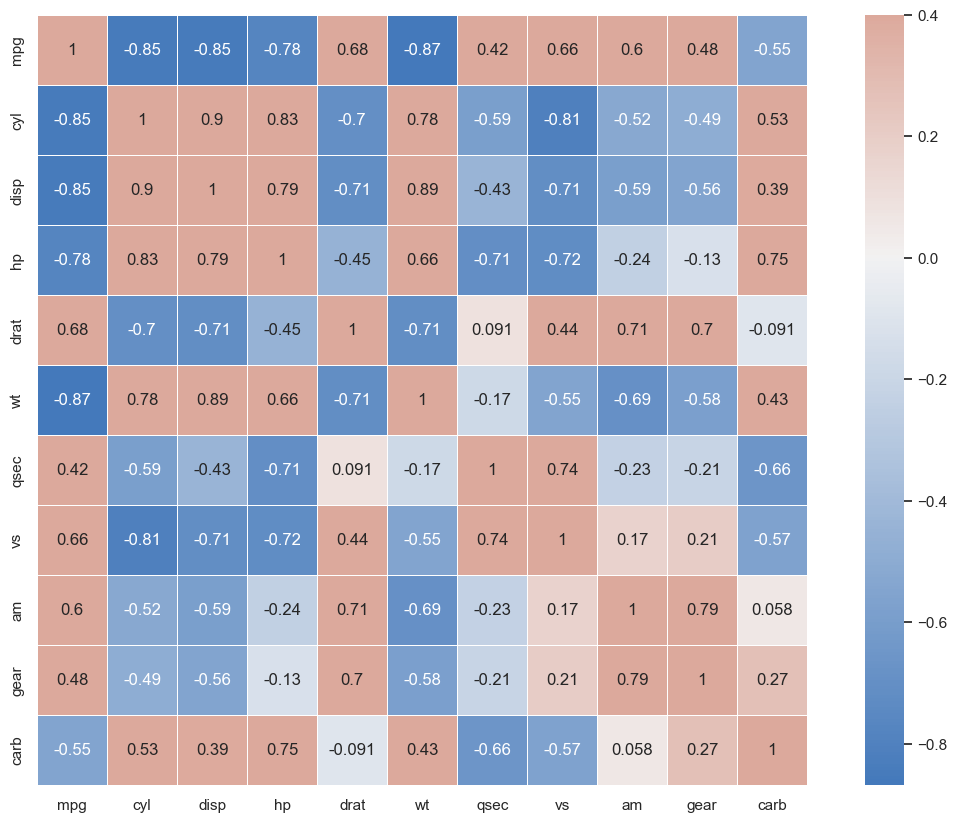

In [37]:
import statsmodels.api as sm
df_cars = sm.datasets.get_rdataset("mtcars","datasets").data

sns.set_theme(style="white")
corr = df_cars.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, annot=True)

## Power analysis examples

#### Power analysis is a statistical method for identifying an appropriate sample size required for a hypothesis test to have sufficient power in preventing Type II errors – or failing to reject the null hypothesis when the null hypothesis should be rejected. Power analysis can also be used for identifying, based on sample size, a detectable effect size (or difference) between samples tested. In other words, based on a specific sample size and distribution, a power analysis can provide the analyst with a specific minimum difference the researcher may be able to reliably identify with a given test. 

In [38]:
from statsmodels.stats.power import TTestPower
import numpy as np
# Difference of distribution mean and the value to be assessed divided by the distribution standard deviation
effect_size = abs(100000-90000) / 2800
powersTT = TTestPower()
result = powersTT.solve_power(effect_size, nobs=3, alpha=0.05, alternative='two-sided')
print('Power based on sample size:{}'.format(round(result,2)))
# Power based on sample size: 0.85

Power based on sample size:0.85
